In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
os.chdir("/content/drive/MyDrive/dsma-crisismmd/")
!pwd

/content/drive/MyDrive/dsma-crisismmd


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import random
from PIL import Image


In [ ]:
data = pd.read_csv("./data_image/california_wildfires_final_data.tsv", sep="\t")


###Basic EDA

In [ ]:
print(data.info())

print(data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1589 entries, 0 to 1588
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   tweet_id           1589 non-null   int64  
 1   image_id           1589 non-null   object 
 2   text_info          1589 non-null   object 
 3   text_info_conf     1589 non-null   float64
 4   image_info         1589 non-null   object 
 5   image_info_conf    1589 non-null   float64
 6   text_human         1589 non-null   object 
 7   text_human_conf    1589 non-null   float64
 8   image_human        1589 non-null   object 
 9   image_human_conf   1589 non-null   float64
 10  image_damage       545 non-null    object 
 11  image_damage_conf  545 non-null    float64
 12  tweet_text         1589 non-null   object 
 13  image_url          1589 non-null   object 
 14  image_path         1589 non-null   object 
dtypes: float64(5), int64(1), object(9)
memory usage: 186.3+ KB
None
tweet_id

In [ ]:
print(data.shape)

(1589, 15)


### Preprocess tweets

In [ ]:
import re

def preprocess_tweet_for_transformer(text):
    # Convert to lowercase
    text = text.lower()

    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

    # Remove mentions
    text = re.sub(r'@\w+', '', text)

    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()

    # Remove RT tag
    text = re.sub('rt : ', '', text)

    return text

# Apply minimal preprocessing to the tweet_text column
data['processed_tweet_text'] = data['tweet_text'].apply(lambda x: preprocess_tweet_for_transformer(str(x)))

# Display the original and processed tweets for comparison
print(data[['tweet_text', 'processed_tweet_text']])


                                             tweet_text  \
0     RT @Gizmodo: Wildfires raging through Northern...   
1     PHOTOS: Deadly wildfires rage in California ht...   
2     RT @Cal_OES: PLS SHARE: Weâ€™re capturing wild...   
3     RT @Cal_OES: PLS SHARE: Weâ€™re capturing wild...   
4     RT @TIME: California's raging wildfires as you...   
...                                                 ...   
1584  GOP targets environmental rules after Californ...   
1585  Motorcycle crash sparked 350-acre fire in Clev...   
1586  Carlâ€™s Jr. #SantaRosa catches #Fire while ma...   
1587  Inside the List: The Romance Writer Who Almost...   
1588  How long will heat, wildfire threat persist in...   

                                   processed_tweet_text  
0     wildfires raging through northern california a...  
1           photos: deadly wildfires rage in california  
2     pls share: weâ€™re capturing wildfire response...  
3     pls share: weâ€™re capturing wildfire response...  
4

In [ ]:
data[['tweet_text', 'processed_tweet_text']]

,tweet_text,processed_tweet_text
0,RT @Gizmodo: Wildfires raging through Northern...,wildfires raging through northern california a...
1,PHOTOS: Deadly wildfires rage in California ht...,photos: deadly wildfires rage in california
2,RT @Cal_OES: PLS SHARE: Weâ€™re capturing wild...,pls share: weâ€™re capturing wildfire response...
3,RT @Cal_OES: PLS SHARE: Weâ€™re capturing wild...,pls share: weâ€™re capturing wildfire response...
4,RT @TIME: California's raging wildfires as you...,california's raging wildfires as you've never ...
...,...,...
1584,GOP targets environmental rules after Californ...,gop targets environmental rules after californ...
1585,Motorcycle crash sparked 350-acre fire in Clev...,motorcycle crash sparked 350-acre fire in clev...
1586,Carlâ€™s Jr. #SantaRosa catches #Fire while ma...,carlâ€™s jr. #santarosa catches #fire while ma...
1587,Inside the List: The Romance Writer Who Almost...,inside the list: the romance writer who almost...


### Display data examples

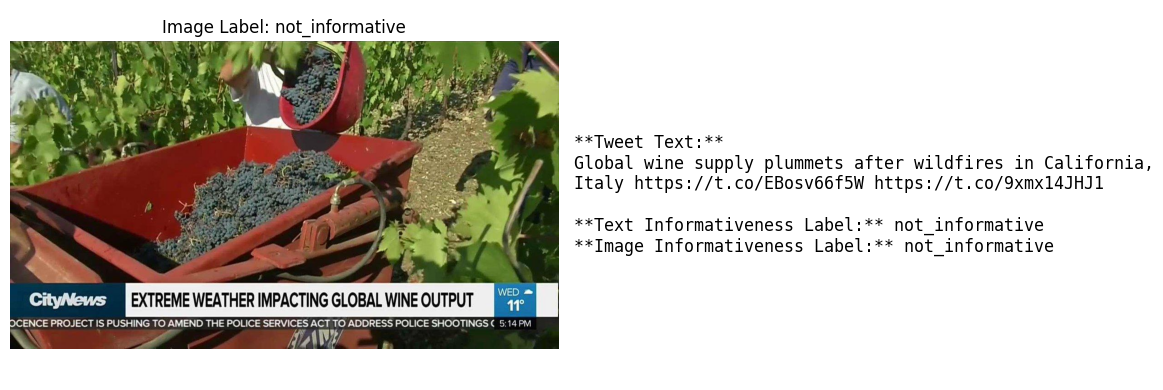

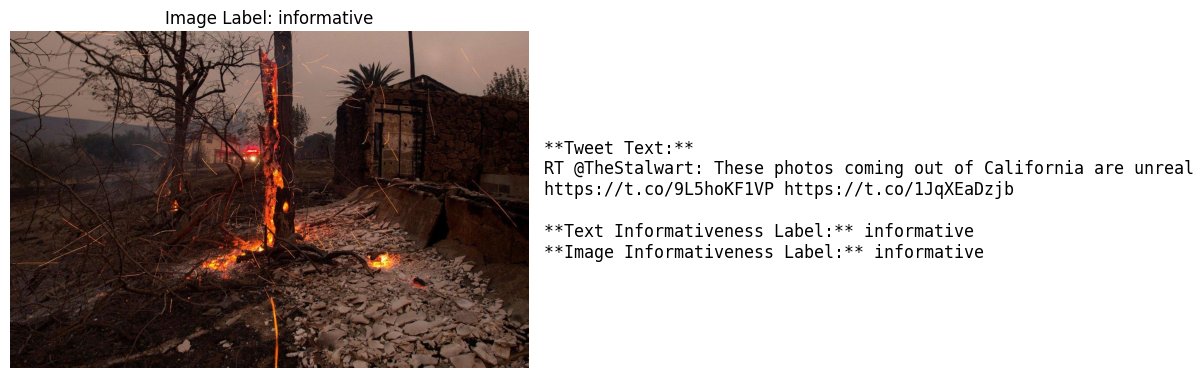

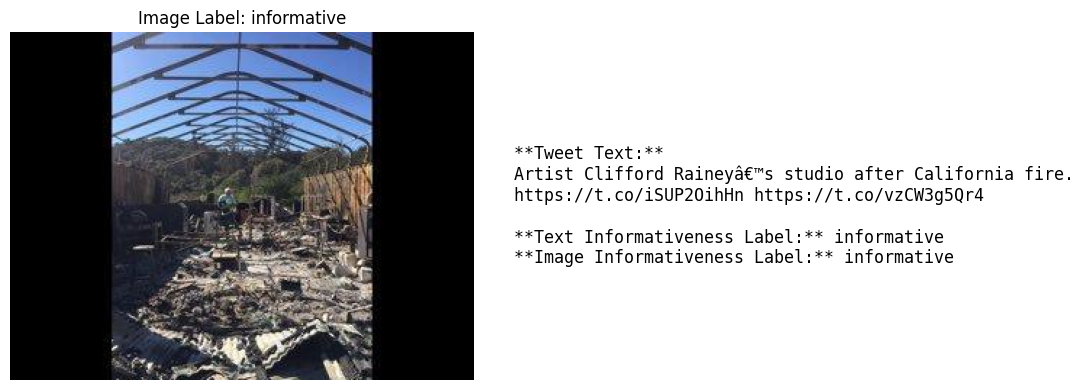

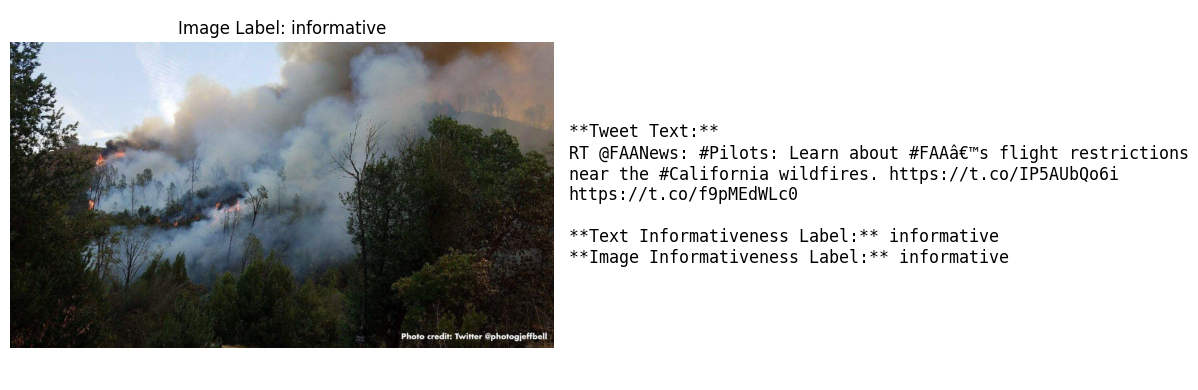

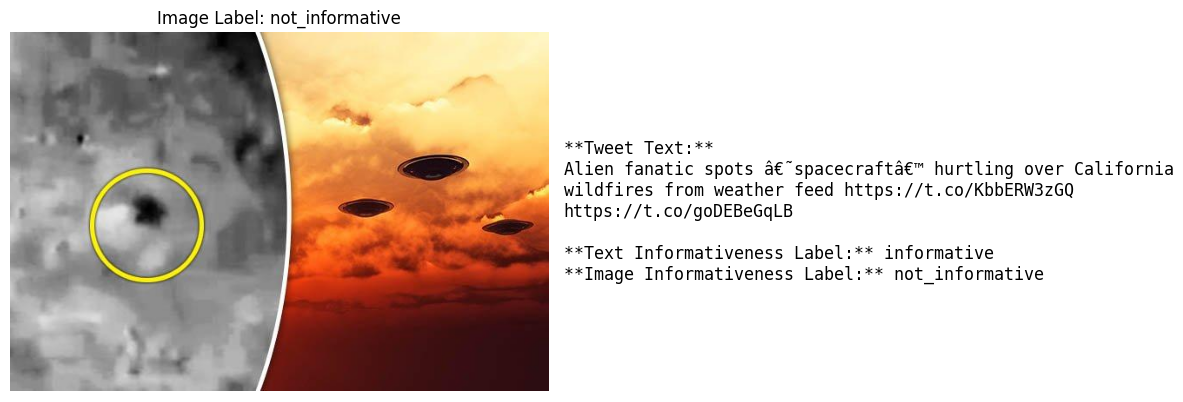

In [ ]:
# Function to display a few examples
def display_examples(data, num_examples=5, image_dir=""):
    # Randomly sample a few rows from the dataset
    samples = data.sample(n=num_examples)

    for _, row in samples.iterrows():
        text = row["tweet_text"]
        text_label = row["text_info"]
        image_label = row["image_info"]
        image_path = row["image_path"]

        # Check if image exists
        if os.path.exists(image_path):
            image = Image.open(image_path)
        else:
            image = None

        # Create the plot
        plt.figure(figsize=(12, 4))

        # Display the image on the left
        if image:
            plt.subplot(1, 2, 1)
            plt.imshow(image)
            plt.axis("off")
            plt.title(f"Image Label: {image_label}")
        else:
            plt.subplot(1, 2, 1)
            plt.text(0.5, 0.5, "Image not found", fontsize=12, ha='center', va='center')
            plt.axis("off")

        # Display the text on the right
        plt.subplot(1, 2, 2)
        text_display = (
            f"**Tweet Text:**\n{text}\n\n"
            f"**Text Informativeness Label:** {text_label}\n"
            f"**Image Informativeness Label:** {image_label}"
        )
        plt.text(0, 0.5, text_display, fontsize=12, wrap=True, verticalalignment="center", family="monospace")
        plt.axis("off")

        # Adjust spacing and show the plot
        plt.tight_layout()
        plt.show()


# Call the function to display examples
display_examples(data, num_examples=5, image_dir="./data_image/california_wildfires")


### Text EDA


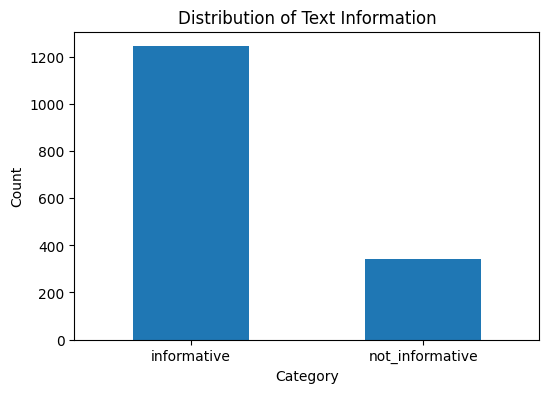

In [ ]:
import matplotlib.pyplot as plt

# Count the occurrences of 'informative' vs. 'not informative'
text_info_counts = data["text_info"].value_counts()

# Plot the distribution
plt.figure(figsize=(6, 4))
text_info_counts.plot(kind='bar')
plt.title("Distribution of Text Information")
plt.xlabel("Category")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()


In [ ]:
# value counts
data["text_info"].value_counts()

,count
text_info,
informative,1245
not_informative,344


### Image EDA

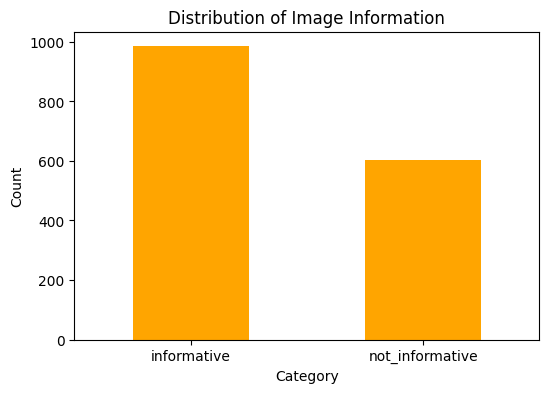

In [ ]:
# Count occurrences of 'informative' vs. 'not informative' in image_info
image_info_counts = data["image_info"].value_counts()

# Plot the distribution
plt.figure(figsize=(6, 4))
image_info_counts.plot(kind='bar', color='orange')
plt.title("Distribution of Image Information")
plt.xlabel("Category")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()


In [ ]:
# value counts
data["image_info"].value_counts()

,count
image_info,
informative,985
not_informative,604


### Correlation Between Text and Image informativeness



image_info       informative  not_informative
text_info                                    
informative              923              322
not_informative           62              282


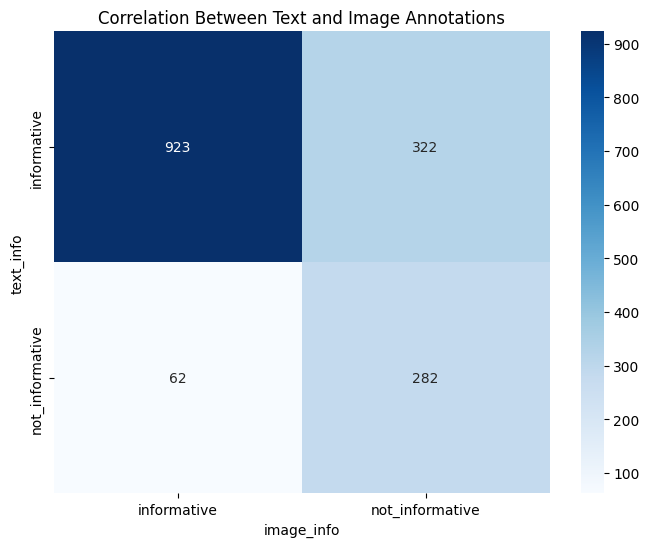

In [ ]:
info_correlation = pd.crosstab(data["text_info"], data["image_info"])
print(info_correlation)

# Heatmap for better visualization
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(info_correlation, annot=True, cmap="Blues", fmt="d")
plt.title("Correlation Between Text and Image Annotations")
plt.show()

### Finding the overall informativeness
- Both mode informative -> Informative
- One informative, one uninformative -> Ambiguous
- Both mode uninformative -> Uninformative


In [ ]:
def assign_label(row):
    if row['text_info'] == 'informative' and row['image_info'] == 'informative':
        return 'Informative'
    elif (row['text_info'] == 'informative' and row['image_info'] != 'informative') or \
         (row['text_info'] != 'informative' and row['image_info'] == 'informative'):
        return 'Ambiguous'
    else:
        return 'Uninformative'


In [ ]:
data['label'] = data.apply(assign_label, axis=1)

In [ ]:
data.head()

,tweet_id,image_id,text_info,text_info_conf,image_info,image_info_conf,text_human,text_human_conf,image_human,image_human_conf,image_damage,image_damage_conf,tweet_text,image_url,image_path,processed_tweet_text,label
0,917791044158185473,917791044158185473_0,informative,1.0000,informative,0.6766,other_relevant_information,1.0000,other_relevant_information,0.6766,NaN,NaN,RT @Gizmodo: Wildfires raging through Northern...,http://pbs.twimg.com/media/DLyi_WYVYAApwNg.jpg,data_image/california_wildfires/10_10_2017/917...,wildfires raging through northern california a...,Informative
1,917791130590183424,917791130590183424_0,informative,1.0000,informative,0.6667,infrastructure_and_utility_damage,1.0000,affected_individuals,0.6667,NaN,NaN,PHOTOS: Deadly wildfires rage in California ht...,http://pbs.twimg.com/media/DLymKm9UMAAu0qw.jpg,data_image/california_wildfires/10_10_2017/917...,photos: deadly wildfires rage in california,Informative
2,917791291823591425,917791291823591425_0,informative,0.6813,informative,1.0000,other_relevant_information,0.6813,infrastructure_and_utility_damage,1.0000,severe_damage,1.0,RT @Cal_OES: PLS SHARE: Weâ€™re capturing wild...,http://pbs.twimg.com/media/DLudaaZV4AAjT7x.jpg,data_image/california_wildfires/10_10_2017/917...,pls share: weâ€™re capturing wildfire response...,Informative
3,917791291823591425,917791291823591425_1,informative,0.6813,not_informative,1.0000,other_relevant_information,0.6813,not_humanitarian,1.0000,NaN,NaN,RT @Cal_OES: PLS SHARE: Weâ€™re capturing wild...,http://pbs.twimg.com/media/DLudaZXUMAABAEZ.jpg,data_image/california_wildfires/10_10_2017/917...,pls share: weâ€™re capturing wildfire response...,Ambiguous
4,917792092100988929,917792092100988929_0,informative,0.6727,informative,0.6612,other_relevant_information,0.6727,infrastructure_and_utility_damage,0.6612,severe_damage,1.0,RT @TIME: California's raging wildfires as you...,http://pbs.twimg.com/media/DLwNe-NXUAE0XCw.jpg,data_image/california_wildfires/10_10_2017/917...,california's raging wildfires as you've never ...,Informative


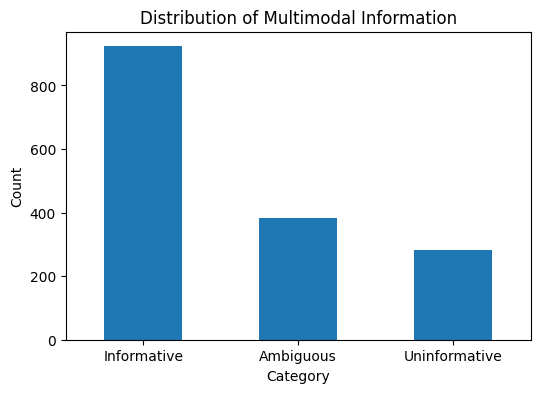

In [ ]:
ambi_info_counts = data["label"].value_counts()

# Plot the distribution
plt.figure(figsize=(6, 4))
ambi_info_counts.plot(kind='bar')
plt.title("Distribution of Multimodal Information")
plt.xlabel("Category")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()

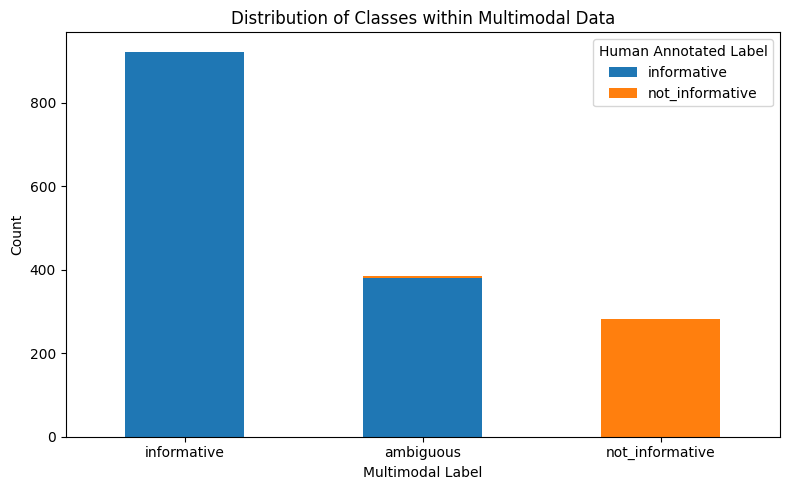

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure correct types
df["label"] = df["label"].replace({"Uninformative": "not_informative"})
df["label"] = df["label"].replace({"Informative": "informative"})
df["label"] = df["label"].replace({"Ambiguous": "ambiguous"})
label_combo = df.groupby(["label", "manual_label"]).size().unstack(fill_value=0)


desired_order = ["informative", "ambiguous", "not_informative"]
label_combo = label_combo.reindex(desired_order)
# Count combinations of 'label' and 'manual_label'

# Plot stacked bar chart
label_combo.plot(kind="bar", stacked=True, figsize=(8, 5))

plt.title("Distribution of Classes within Multimodal Data")
plt.xlabel("Multimodal Label")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.legend(title="Human Annotated Label", loc='upper right')
plt.tight_layout()
plt.show()


In [ ]:
ambi_info_counts

,count
label,
Informative,923
Ambiguous,384
Uninformative,282


### Manual label of ambiguous data

In [ ]:
# df = data.copy()

# path = "./CrisisMMD_v2.0/"
# if 'manual_label' not in df.columns:
#     df['manual_label'] = df['label']

# # Filter rows with 'ambiguous' label
# ambiguous_rows = df[df['label'] == 'Ambiguous']

# # Iterate through ambiguous rows for manual classification
# for index, row in ambiguous_rows.iterrows():
#     print(f"Tweet ID: {row['tweet_id']}")
#     print(f"Text: {row['processed_tweet_text']}")
#     image_p = path+row['image_path']
#     try:
#         img = Image.open(image_p)
#         plt.imshow(img)
#         plt.axis('off')
#         plt.show()
#     except FileNotFoundError:
#         print(f"Image not found at {image_p}")

#     # Prompt for manual classification
#     while True:
#         manual_label = input("Classify as 'informative' or 'uninformative': ")
#         if manual_label == 0:
#             manual_labell = 'Uninformative'
#         else:
#             manual_labell = 'Informative'
#         df.at[index, 'manual_label'] = manual_labell
#         break



### Load annotated data

In [ ]:
# load manually annotated data
df = pd.read_csv("./data_image/manually_annotated_data")
df['is_ambiguous'] = (df['label'] == "Ambiguous").astype(int)


image_info       informative  not_informative
manual_label                                 
informative              984              319
not_informative            1              285


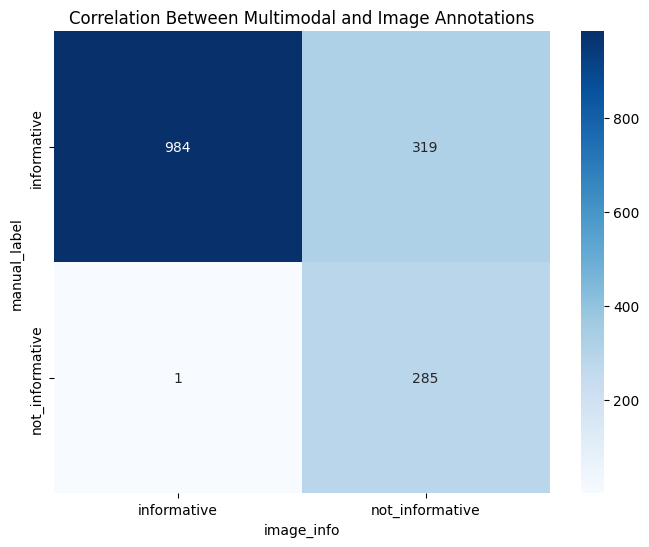

In [ ]:
img_info_correlation = pd.crosstab(df["manual_label"], df["image_info"])
print(img_info_correlation)

# Heatmap for better visualization
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(img_info_correlation, annot=True, cmap="Blues", fmt="d")
plt.title("Correlation Between Multimodal and Image Annotations")
plt.show()

text_info        informative  not_informative
manual_label                                 
informative             1242               61
not_informative            3              283


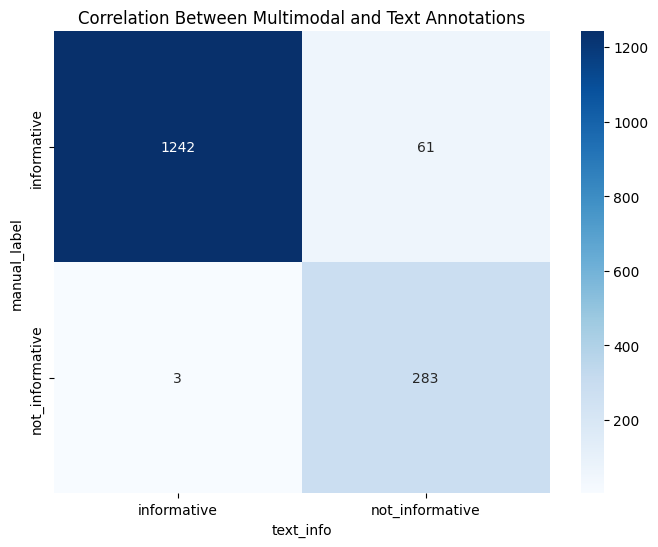

In [ ]:
text_info_correlation = pd.crosstab(df["manual_label"], df["text_info"])
print(text_info_correlation)

# Heatmap for better visualization
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(text_info_correlation, annot=True, cmap="Blues", fmt="d")
plt.title("Correlation Between Multimodal and Text Annotations")
plt.show()

In [ ]:
df[df['label']=="Ambiguous"]["manual_label"].value_counts()

,count
manual_label,
informative,380
not_informative,4


### Model


#### Prep data

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split


train_data, test_data = train_test_split(
    df,
    test_size=0.2,  # 20% test split
    stratify=df['is_ambiguous'],  # Stratify based on the ambiguity flag
    random_state=42
)

print("Proportion of Ambiguous Data in Training Set:", train_data['is_ambiguous'].mean())
print("Proportion of Ambiguous Data in Testing Set:", test_data['is_ambiguous'].mean())
print("Train:", train_data.shape)
print("Test:", test_data.shape)


Proportion of Ambiguous Data in Training Set: 0.24154209284028325
Proportion of Ambiguous Data in Testing Set: 0.24213836477987422
Train: (1271, 10)
Test: (318, 10)


In [ ]:
test_data[test_data['label']=="Ambiguous"]["manual_label"].value_counts()

,count
manual_label,
informative,74
not_informative,3


#### Unimodal Text


In [ ]:
from transformers import BertTokenizer
from sklearn.preprocessing import LabelEncoder

# Initialize BERT tokenizer
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

# Tokenize the text data
train_encodings = tokenizer(list(train_data['processed_tweet_text']), truncation=True, padding=True, max_length=128, return_tensors="pt")
test_encodings = tokenizer(list(test_data['processed_tweet_text']), truncation=True, padding=True, max_length=128, return_tensors="pt")

# Encode the labels
label_encoder = LabelEncoder()
train_labels = label_encoder.fit_transform(train_data['manual_label'])
test_labels = label_encoder.transform(test_data['manual_label'])

print("Label mapping:", dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

Label mapping: {'informative': 0, 'not_informative': 1}


In [ ]:
import torch

class TextDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        item = {key: val[idx] for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

# Create datasets
train_dataset = TextDataset(train_encodings, train_labels)
test_dataset = TextDataset(test_encodings, test_labels)


In [ ]:
from transformers import BertForSequenceClassification, Trainer, TrainingArguments

# Load pre-trained BERT model for classification
model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=len(label_encoder.classes_))

# Define training arguments
training_args = TrainingArguments(
    output_dir="./results",          # Directory to save model checkpoints
    evaluation_strategy="epoch",    # Evaluate at the end of each epoch
    save_strategy="epoch",          # Save model at the end of each epoch
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=10,
    weight_decay=0.01,
    logging_dir="./logs",           # Directory to save logs
    logging_steps=10,
    save_total_limit=2,
    report_to="none"
)

# Set up the Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
)


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [ ]:
trainer.train()


Epoch,Training Loss,Validation Loss
1,0.395200,0.434975
2,0.439100,0.416090
3,0.293500,0.443942
4,0.191500,0.558648
5,0.030800,0.747998
6,0.132500,0.788514
7,0.006100,0.863714
8,0.039500,0.909076
9,0.060600,0.933102
10,0.002600,0.952581


TrainOutput(global_step=800, training_loss=0.17657489493489265, metrics={'train_runtime': 280.0821, 'train_samples_per_second': 45.38, 'train_steps_per_second': 2.856, 'total_flos': 287387161327200.0, 'train_loss': 0.17657489493489265, 'epoch': 10.0})

In [ ]:
from sklearn.metrics import classification_report

# Get predictions
predictions = trainer.predict(test_dataset)
y_pred = predictions.predictions.argmax(axis=1)

# Decode labels back to original text format
y_true = label_encoder.inverse_transform(test_labels)
y_pred_decoded = label_encoder.inverse_transform(y_pred)

# Print classification report
print(classification_report(y_true, y_pred_decoded))


                 precision    recall  f1-score   support

    informative       0.86      0.92      0.89       262
not_informative       0.46      0.30      0.37        56

       accuracy                           0.81       318
      macro avg       0.66      0.61      0.63       318
   weighted avg       0.79      0.81      0.80       318



In [ ]:
ambiguous_indices = test_data[test_data['label'] == 'Ambiguous'].index

# Filter true and predicted labels for ambiguous cases
ambiguous_true = [y_true[i] for i in range(len(y_true)) if test_data.iloc[i].name in ambiguous_indices]
ambiguous_pred = [y_pred_decoded[i] for i in range(len(y_pred_decoded)) if test_data.iloc[i].name in ambiguous_indices]

# Step 4: Generate classification report for ambiguous cases
print("Classification Report for Ambiguous Cases (Text Model):")
print(classification_report(ambiguous_true, ambiguous_pred))

Classification Report for Ambiguous Cases (Text Model):
                 precision    recall  f1-score   support

    informative       0.95      0.85      0.90        74
not_informative       0.00      0.00      0.00         3

       accuracy                           0.82        77
      macro avg       0.48      0.43      0.45        77
   weighted avg       0.92      0.82      0.86        77



#### Unimodal Image


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models, transforms
from torch.utils.data import DataLoader, Dataset, WeightedRandomSampler
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report
from PIL import Image
import pandas as pd
from tqdm import tqdm
import numpy as np


# ------------------------------

# Define transforms
train_transforms = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15),
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

val_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Custom Dataset Class
class CustomDataset(Dataset):
    def __init__(self, dataframe, transform=None):
        self.dataframe = dataframe
        self.transform = transform

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        row = self.dataframe.iloc[idx]
        image = Image.open(row['image_path']).convert("RGB")
        label = row['manual_label']
        if self.transform:
            image = self.transform(image)
        return image, label

# Create datasets
train_dataset = CustomDataset(train_data, transform=train_transforms)
test_dataset = CustomDataset(test_data, transform=val_transforms)

# Compute class weights
classes = np.unique(train_data['manual_label'])
class_weights = compute_class_weight('balanced', classes=classes, y=train_data['manual_label'])
class_weights = torch.tensor(class_weights, dtype=torch.float).to(device)

# Map labels to integers for PyTorch
label_mapping = {label: idx for idx, label in enumerate(classes)}
train_data['mapped_label'] = train_data['manual_label'].map(label_mapping)
test_data['mapped_label'] = test_data['manual_label'].map(label_mapping)

# # Weighted sampler for balanced batches
# sample_weights = train_data['manual_label'].map({cls: class_weights[idx] for idx, cls in enumerate(classes)}).values
# sampler = WeightedRandomSampler(weights=sample_weights, num_samples=len(sample_weights), replacement=True)

# DataLoaders
train_loader = DataLoader(train_dataset, batch_size=32,num_workers=2)# sampler=sampler, num_workers=2)
val_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=2)

# ------------------------------
# 2. Model Preparation
# ------------------------------
# Load pre-trained VGG16 model
vgg16 = models.vgg16(pretrained=True)

# Freeze early layers
for param in vgg16.features.parameters():
    param.requires_grad = False

# Replace classifier
vgg16.classifier = nn.Sequential(
    nn.Linear(vgg16.classifier[0].in_features, 512),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(512, len(classes))  # Number of classes
)

# Move model to GPU/CPU
vgg16.to(device)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss(weight=class_weights)  # Use class weights in loss function
optimizer = optim.Adam(vgg16.parameters(), lr=1e-4, weight_decay=1e-4)

# ------------------------------
# 3. Training and Validation Loops
# ------------------------------
def train_model(model, dataloader, criterion, optimizer, device):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for images, labels in tqdm(dataloader):
        images = images.to(device)
        labels = torch.tensor([label_mapping[l] for l in labels]).to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        _, preds = torch.max(outputs, 1)
        correct += (preds == labels).sum().item()
        total += labels.size(0)
        running_loss += loss.item()

    return running_loss / len(dataloader), correct / total


def evaluate_model(model, dataloader, criterion, device):
    model.eval()
    running_loss = 0.0
    correct = 0
    total = 0
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for images, labels in dataloader:
            images = images.to(device)
            labels = torch.tensor([label_mapping[l] for l in labels]).to(device)

            outputs = model(images)
            loss = criterion(outputs, labels)

            _, preds = torch.max(outputs, 1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)
            running_loss += loss.item()

            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    return running_loss / len(dataloader), correct / total, all_preds, all_labels


# ------------------------------
# 4. Training with Early Stopping
# ------------------------------
num_epochs = 25
best_val_loss = float('inf')
patience = 5
early_stopping_counter = 0

for epoch in range(num_epochs):
    print(f"Epoch {epoch + 1}/{num_epochs}")

    # Training phase
    train_loss, train_acc = train_model(vgg16, train_loader, criterion, optimizer, device)

    # Validation phase
    val_loss, val_acc, val_preds, val_labels = evaluate_model(vgg16, val_loader, criterion, device)

    print(f"Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}")
    print(f"Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}")

    # Early stopping
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        early_stopping_counter = 0
        torch.save(vgg16.state_dict(), "best_vgg16_model.pth")
        print("Saved best model.")
    else:
        early_stopping_counter += 1
        if early_stopping_counter >= patience:
            print("Early stopping triggered.")
            break

# ------------------------------
# 5. Generate Classification Report
# ------------------------------
# Decode predictions and labels
decoded_preds = [classes[p] for p in val_preds]
decoded_labels = [classes[l] for l in val_labels]

print("Classification Report:")
print(classification_report(decoded_labels, decoded_preds))


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:08<00:00, 67.7MB/s]


Epoch 1/25


100%|██████████| 40/40 [05:14<00:00,  7.87s/it]


Train Loss: 0.7342, Train Acc: 0.6530
Val Loss: 0.6102, Val Acc: 0.7862
Saved best model.
Epoch 2/25


100%|██████████| 40/40 [00:17<00:00,  2.29it/s]


Train Loss: 0.4603, Train Acc: 0.7852
Val Loss: 0.8292, Val Acc: 0.7799
Epoch 3/25


100%|██████████| 40/40 [00:16<00:00,  2.37it/s]


Train Loss: 0.3915, Train Acc: 0.8049
Val Loss: 0.8348, Val Acc: 0.8082
Epoch 4/25


100%|██████████| 40/40 [00:17<00:00,  2.34it/s]


Train Loss: 0.3316, Train Acc: 0.8403
Val Loss: 0.8875, Val Acc: 0.7893
Epoch 5/25


100%|██████████| 40/40 [00:16<00:00,  2.43it/s]


Train Loss: 0.2850, Train Acc: 0.8710
Val Loss: 1.0054, Val Acc: 0.8145
Epoch 6/25


100%|██████████| 40/40 [00:16<00:00,  2.38it/s]


Train Loss: 0.2476, Train Acc: 0.8969
Val Loss: 1.0989, Val Acc: 0.8082
Early stopping triggered.
Classification Report:
                 precision    recall  f1-score   support

    informative       0.87      0.90      0.89       262
not_informative       0.44      0.36      0.40        56

       accuracy                           0.81       318
      macro avg       0.66      0.63      0.64       318
   weighted avg       0.79      0.81      0.80       318



In [ ]:
from sklearn.metrics import classification_report

ambiguous_cases = test_data[test_data['label'] == 'Ambiguous']

ambiguous_indices = ambiguous_cases.index
ambiguous_true = [val_labels[i] for i in range(len(val_labels)) if test_data.iloc[i].name in ambiguous_indices]
ambiguous_pred = [val_preds[i] for i in range(len(val_preds)) if test_data.iloc[i].name in ambiguous_indices]

# Decode labels if they are integers
decoded_true = [classes[label] for label in ambiguous_true]
decoded_pred = [classes[label] for label in ambiguous_pred]

print("Classification Report for Ambiguous Cases:")
print(classification_report(decoded_true, decoded_pred))


Classification Report for Ambiguous Cases:
                 precision    recall  f1-score   support

    informative       0.97      0.81      0.88        74
not_informative       0.07      0.33      0.11         3

       accuracy                           0.79        77
      macro avg       0.52      0.57      0.50        77
   weighted avg       0.93      0.79      0.85        77



#### Multimodal

In [ ]:
from sklearn.utils import resample
from sklearn.preprocessing import LabelEncoder

# Encode labels
label_encoder = LabelEncoder()
train_data['encoded_label'] = label_encoder.fit_transform(train_data['manual_label'])
test_data['encoded_label'] = label_encoder.transform(test_data['manual_label'])


# Separate majority and minority classes
majority_class = train_data[train_data['encoded_label'] == 0]
minority_class = train_data[train_data['encoded_label'] == 1]

# Oversample the minority class
minority_oversampled = resample(minority_class,
                                replace=True,
                                n_samples=len(majority_class),
                                random_state=42)

train_data_balanced = pd.concat([majority_class, minority_oversampled]).sample(frac=1)


In [ ]:
train_data_balanced['manual_label'].value_counts()

,count
manual_label,
not_informative,1041
informative,1041


In [ ]:
from torchvision import transforms
from torch.utils.data import DataLoader, Dataset
from PIL import Image
import torch
from transformers import BertTokenizer

# Image transformations
image_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Tokenizer for BERT
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

# Dataset class
class MultimodalDataset(Dataset):
    def __init__(self, dataframe, image_transform=None):
        self.dataframe = dataframe
        self.image_transform = image_transform

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        row = self.dataframe.iloc[idx]

        # Process text
        text = row['processed_tweet_text']
        text_inputs = tokenizer(
            text,
            padding="max_length",
            truncation=True,
            max_length=128,
            return_tensors="pt"
        )

        # Process image
        image = Image.open(row['image_path']).convert("RGB")
        if self.image_transform:
            image = self.image_transform(image)

        # Label
        label = torch.tensor(row['encoded_label'], dtype=torch.long)

        return {
            "text_inputs": {key: val.squeeze(0) for key, val in text_inputs.items()},
            "image": image,
            "label": label
        }

train_dataset = MultimodalDataset(train_data_balanced, image_transform=image_transforms)
test_dataset = MultimodalDataset(test_data, image_transform=image_transforms)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True, num_workers=2)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False, num_workers=2)

In [ ]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
from torchvision import models
from transformers import BertModel
import torch.nn as nn
import torch

class MultimodalModel(nn.Module):
    def __init__(self, num_classes):
        super(MultimodalModel, self).__init__()

        # Image Modality: VGG16
        self.image_model = models.vgg16(pretrained=True)
        self.image_model.classifier = nn.Sequential(
            nn.Linear(self.image_model.classifier[0].in_features, 1024),  # Reduce to 1024
            nn.ReLU(),
            nn.Dropout(0.3),  # Add dropout
            nn.LayerNorm(1024),  # Add layer normalization
        )

        # Text Modality: BERT
        self.text_model = BertModel.from_pretrained("bert-base-uncased")

        self.text_fc = nn.Sequential(
            nn.Linear(self.text_model.config.hidden_size, 1024),
            nn.ReLU(),
            nn.BatchNorm1d(1024),
            nn.Dropout(0.3),
        )


        # Cross-Attention for Fusion
        self.cross_attention = nn.MultiheadAttention(embed_dim=1024, num_heads=8)

        # Fusion Layers
        self.fusion_fc = nn.Sequential(
            nn.Linear(2048, 1024),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(1024, 512),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(512, num_classes),
        )


    def forward(self, text_inputs, image_inputs):
        # Process text
        text_output = self.text_model(
            input_ids=text_inputs['input_ids'],
            attention_mask=text_inputs['attention_mask']
        )
        text_features = self.text_fc(text_output.pooler_output)  # BERT outputs a pooled vector

        # Process image
        image_features = self.image_model(image_inputs)

        # Cross-Attention Fusion
        # Reshape for attention: (batch_size, seq_len, embed_dim)
        text_features = text_features.unsqueeze(1)  # Add sequence dimension
        image_features = image_features.unsqueeze(1)  # Add sequence dimension
        fused_features, _ = self.cross_attention(
            query=text_features, key=image_features, value=image_features
        )
        fused_features = fused_features.squeeze(1)  # Remove sequence dimension

        # Combine text and image features
        combined_features = torch.cat((text_features.squeeze(1), fused_features), dim=1)

        # Final classification
        output = self.fusion_fc(combined_features)
        return output


In [ ]:
from tqdm import tqdm

def train_model(model, dataloader, criterion, optimizer, device):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for batch in tqdm(dataloader):
        text_inputs = {key: val.to(device) for key, val in batch['text_inputs'].items()}
        images = batch['image'].to(device)
        labels = batch['label'].to(device)

        optimizer.zero_grad()
        outputs = model(text_inputs, images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        _, preds = torch.max(outputs, 1)
        correct += (preds == labels).sum().item()
        total += labels.size(0)
        running_loss += loss.item()

    return running_loss / len(dataloader), correct / total


def evaluate_model(model, dataloader, criterion, device):
    model.eval()
    running_loss = 0.0
    correct = 0
    total = 0
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for batch in dataloader:
            text_inputs = {key: val.to(device) for key, val in batch['text_inputs'].items()}
            images = batch['image'].to(device)
            labels = batch['label'].to(device)

            outputs = model(text_inputs, images)
            loss = criterion(outputs, labels)

            _, preds = torch.max(outputs, 1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)
            running_loss += loss.item()

            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    return running_loss / len(dataloader), correct / total, all_preds, all_labels


In [ ]:
num_classes = len(label_encoder.classes_)  # Number of classes
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Initialize model, criterion, optimizer
model = MultimodalModel(num_classes)
bestmodel = MultimodalModel(num_classes)

model.to(device)
bestmodel.to(device)
# criterion = nn.CrossEntropyLoss(weight=class_weights)
criterion = nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(model.parameters(), lr=1e-4, weight_decay=0.001)

# Training loop with early stopping
best_val_loss = 1000000
patience = 2
early_stopping_counter = 0
num_epochs = 20

for epoch in range(num_epochs):
    print(f"Epoch {epoch + 1}/{num_epochs}")
    train_loss, train_acc = train_model(model, train_loader, criterion, optimizer, device)
    val_loss, val_acc, val_preds, val_labels = evaluate_model(model, test_loader, criterion, device)

    print(f"Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}")
    print(f"Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}")

    if val_loss < best_val_loss:
        best_val_loss = val_loss
        early_stopping_counter = 0
        bestmodel.load_state_dict(model.state_dict())
        torch.save(model.state_dict(), "best_multimodal_model.pth")
        print("Saved best model.")
    else:
        early_stopping_counter += 1
        if early_stopping_counter >= patience:
            print("Early stopping triggered.")
            break


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch 1/20


100%|██████████| 131/131 [01:14<00:00,  1.75it/s]


Train Loss: 0.5639, Train Acc: 0.6907
Val Loss: 0.6734, Val Acc: 0.7547
Saved best model.
Epoch 2/20


100%|██████████| 131/131 [01:19<00:00,  1.64it/s]


Train Loss: 0.2770, Train Acc: 0.9006
Val Loss: 0.6499, Val Acc: 0.7830
Saved best model.
Epoch 3/20


100%|██████████| 131/131 [01:20<00:00,  1.63it/s]


Train Loss: 0.1178, Train Acc: 0.9697
Val Loss: 0.8608, Val Acc: 0.8050
Saved best model.
Epoch 4/20


100%|██████████| 131/131 [01:20<00:00,  1.64it/s]


Train Loss: 0.0871, Train Acc: 0.9736
Val Loss: 1.0308, Val Acc: 0.8365
Saved best model.
Epoch 5/20


100%|██████████| 131/131 [01:19<00:00,  1.64it/s]


Train Loss: 0.1147, Train Acc: 0.9659
Val Loss: 1.2888, Val Acc: 0.7956
Epoch 6/20


100%|██████████| 131/131 [01:18<00:00,  1.66it/s]


Train Loss: 0.0849, Train Acc: 0.9774
Val Loss: 0.9919, Val Acc: 0.8082
Early stopping triggered.


In [ ]:
# model2 = MultimodalModel(num_classes=num_classes).to(device)

# model2.load_state_dict(torch.load("best_multimodal_model.pth"))

# Set the model to evaluation mode
bestmodel.eval()

val_loss, val_acc, val_preds, val_labels = evaluate_model(bestmodel, test_loader, criterion, device)


In [ ]:
from sklearn.metrics import classification_report

decoded_preds = label_encoder.inverse_transform(val_preds)
decoded_labels = label_encoder.inverse_transform(val_labels)

# Print classification report for the entire test set
print("Classification Report for Entire Test Set:")
print(classification_report(decoded_labels, decoded_preds))


Classification Report for Entire Test Set:
                 precision    recall  f1-score   support

    informative       0.86      0.96      0.91       262
not_informative       0.58      0.27      0.37        56

       accuracy                           0.84       318
      macro avg       0.72      0.61      0.64       318
   weighted avg       0.81      0.84      0.81       318



In [ ]:
ambiguous_indices = test_data[test_data['label'] == 'Ambiguous'].index

# Extract true and predicted labels for ambiguous data
ambiguous_true = [val_labels[i] for i, idx in enumerate(test_data.index) if idx in ambiguous_indices]
ambiguous_pred = [val_preds[i] for i, idx in enumerate(test_data.index) if idx in ambiguous_indices]

# Decode ambiguous labels
ambiguous_true_decoded = label_encoder.inverse_transform(ambiguous_true)
ambiguous_pred_decoded = label_encoder.inverse_transform(ambiguous_pred)

# Print classification report for ambiguous data
print("Classification Report for Ambiguous Data:")
print(classification_report(ambiguous_true_decoded, ambiguous_pred_decoded))

Classification Report for Ambiguous Data:
                 precision    recall  f1-score   support

    informative       0.96      0.93      0.95        74
not_informative       0.00      0.00      0.00         3

       accuracy                           0.90        77
      macro avg       0.48      0.47      0.47        77
   weighted avg       0.92      0.90      0.91        77

